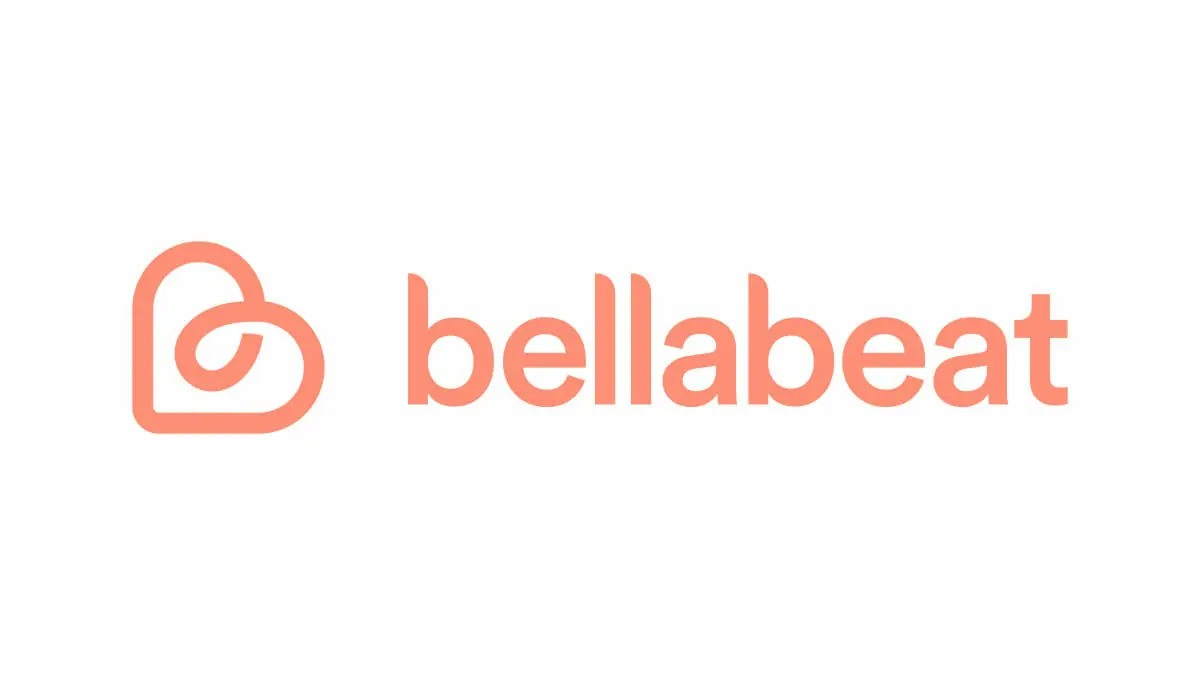

## Table of Contents
* [Introduction](#intro)
* [1. Ask](#ask)
* [2. Prepare](#prepare)
* [3. Process](#process)
    * [3.1  Exploring dailyActivity Dataframe](#3.1)
    * [3.2  Exploring hourlyCalories Dataframe](#3.2)
    * [3.3  Exploring hourlySteps Dataframe](#3.3)
    * [3.4  Exploring sleepDay Dataframe](#3.4)
* [4. Analyse](#analyse)
    * [4.1  Daily Activity Dataframe](#4.1)
    * [4.2  Hourly Calories Dataframe](#4.2)
    * [4.3  Hourly Steps Dataframe](#4.3)
    * [4.4  Sleep Day Dataframe](#4.4)
* [5. Share](#share)
    * [5.1  Findings - Based on Device Usage](#5.1)
    * [5.2  Findings - Based on Activity Patterns](#5.2)
    * [5.3  Findings - Based on Sleeping Patterns](#5.3)
* [6. Act](#act)

<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: center;">
    <h1 id='intro' style="margin: 0; color: white;">Introduction</h1>
    <a class="anchor"  id="intro"></a>
</div>


Bellabeat is a high-tech company founded by Urška Sršen and Sandro Mur in 2014 which manufactures health-focused products for women. It is a successful small company, but they have the potential to become a larger player in the global smart device market.  Bellabeat produces stylish smart devices, which collect data on activity, sleep, steps, calorie and reproductive health, empowering women with knowledge about their health and habits. Bellabeat is well known in the fem-tech industry for its Leaf smart-jewellery line. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.


<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: left;">
    <h1 style="margin: 0; color: white;">1. Ask</h1>
    <a class="anchor"  id="ask"></a>
</div>


<h4 id='BusinessTask'>Business Task</h4>
Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices to unlock new growth opportunities for the company.

<h4 id='KeyStakeholders'>Key Stakeholders</h4>
1. UrškaSršen:Bellabeat’s cofounder and Chief Creative Officer
2. SandoMur:Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
3. Bellabeat marketing analytics team

<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: left;">
    <h1 id="prepare" style="margin: 0; color: white;">2. Prepare</h1>
    <a class="anchor"  id="prepare"></a>
</div>

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) dataset published by [Möbius](https://www.kaggle.com/arashnic) has been used for this case study. 

This dataset contains personal tracker data of over thirty Fitbit users who consented to contribute, including minute-level output for physical activity, heart rate, and sleep monitoring from 12/4/2016 to 12/5/2016. The original dataset contains 18 csv files but for this case study, only four datasets are selected. The dailyActivity dataset is a wide dataset and the rest of the datasets are in long format. Since the dataset contains records of over thirty users, the dataset is compatible with comprehensive descriptive analysis.





<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: left;">
    <h1 style="margin: 0; color: white;">3. Process</h1>
    <a class="anchor"  id="process"></a>
</div>

Now it's time to load the required libraries.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Next, we load the selected datasets from the Fitbit data dataset.
* dailyActivity
* hourlyCalories
* hourlySteps
* sleepDay

In [ ]:
dailyActivity = pd.read_csv('../input/fitabasedata/dailyActivity.csv')
hourlyCalories = pd.read_csv('../input/fitabasedata/hourlyCalories.csv')
hourlySteps = pd.read_csv('../input/fitabasedata/hourlySteps.csv')
sleepDay = pd.read_csv('../input/fitabasedata/sleepDay.csv')


<h4>3.1 Exploring dailyActivity Dataframe</h4>
<a class="anchor"  id="3.1"></a>

In [ ]:
dailyActivity.head()

In [ ]:
dailyActivity.info()

In [ ]:
# Check for missing values 
dailyActivity.isnull().sum()

* Checking for duplicate values

In [ ]:
# Checking duplicate values
duplicate_counts = dailyActivity.duplicated(keep='first').sum()
print("Number of duplicates in dailyActivity: ",duplicate_counts)

In [ ]:
# Checking number of unique Ids
unique_users = dailyActivity['Id'].nunique()
print("Number of unique Ids: ",unique_users)

#### Processing dailyActivity Dataframe

* Converting the data type of ActivityDate to Date.

In [ ]:
# Converting ActivityDate into DateTime format
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format= '%m/%d/%Y')

#Then check header to confirm modification is done correctly
dailyActivity.head()

* Adding a new column, 'MinutesDeviceWorn' by adding 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes' and 'SedentaryMinutes' columns.

In [ ]:
# Creating a new column 'MinuetsDeviceWorn' assuming the sum of 'VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes' and 'SedantaryMinutes' equal to the total time device used/worn by the user
dailyActivity['MinutesDeviceWorn'] = dailyActivity['VeryActiveMinutes'] + dailyActivity['FairlyActiveMinutes'] + dailyActivity['LightlyActiveMinutes'] + dailyActivity['SedentaryMinutes']

#Then check header to confirm modification is done correctly
dailyActivity.head()

* Insert a calculated column using 'MinutesDeviceWorn' to get the percentage of time devices used within a day.
* Then add another column 'DailyUsage' based on the 'DailyUsePercentage' column to categorise  users based on their device use percentages.
<pre>1. If daily use percentage equal to 100, then 'All Day'</pre>
<pre>2. If daily use percentage greater than or equal to 50, then 'More than half a day'</pre>
<pre>3. Else 'Less than half a day'</pre>

In [ ]:
# Creating a new column 'DailyUsePercentage'
dailyActivity['DailyUsePercentage'] = dailyActivity['MinutesDeviceWorn']/1440*100

# Creating a new column 'UserCategory'
conditions = [
    dailyActivity['DailyUsePercentage'] == 100,
    dailyActivity['DailyUsePercentage'] >= 50
]

values = ['All Day', 'More than half a day']

dailyActivity['DailyUsage'] = np.select(conditions, values, default='Less than half a day')

dailyActivity.head()

* Creating another categorical column to categorise users based on device usage within a month.
<pre>1. If days devices used less than or equal to 10, then 'LowUse'</pre>
<pre>2. If days devices used less than or equal to 20, then 'ModerateUse'</pre>
<pre>3. Else categorise as 'HighUse'</pre>

In [ ]:
# adding a new categorical column based on mothly usage into 'dailyActivity'
def categorize_users(df):
    def assign_category(count):
        if count <= 10:
            return 'LowUse'
        elif count <= 20:
            return 'ModerateUse'
        else:
            return 'HighUse'

    user_counts = df['Id'].value_counts()
    category_map = user_counts.apply(assign_category).to_dict()
    df['MnthlyUsageCategory'] = df['Id'].map(category_map)

    return df

df = categorize_users(dailyActivity)

dailyActivity.head()

* Extracting the day of the week into a new column.

In [ ]:
# Creating a new column 'Day
dailyActivity['Day'] = dailyActivity['ActivityDate'].dt.day_name().str[:3]

dailyActivity.head()

<h4 id='ExploringHourlyCaloriesDataframe'>3.2 Exploring hourlyCalories Dataframe</h4>
<a class="anchor"  id="3.2"></a>

In [ ]:
hourlyCalories.head()

In [ ]:
hourlyCalories.info()

In [ ]:
# Check for missing values
hourlyCalories.isnull().sum()

In [ ]:
# Checking duplicate values
duplicate_counts = hourlyCalories.duplicated(keep='first').sum()
print("Number of duplicates in hourlyCalories: ",duplicate_counts)

In [ ]:
# Checking number of unique Ids
unique_users = hourlyCalories['Id'].nunique()
print("Number of unique Ids: ",unique_users)

#### Processing hourlyCalories Dataframe

* Change the data type of 'ActivityHour' column to date.

In [ ]:
# Converting ActivityHour into DateTime format
hourlyCalories['ActivityHour'] = pd.to_datetime(hourlyCalories['ActivityHour'], format= '%m/%d/%Y %I:%M:%S %p')

#Then check header to confirm modification is done correctly
hourlyCalories.head()

* Extract the day of the week and the hour of the day into new columns

In [ ]:
# Creating two new columns to extract Hour and Day from ActivityHour
hourlyCalories['Hour'] = hourlyCalories['ActivityHour'].dt.hour
hourlyCalories['Day'] = hourlyCalories['ActivityHour'].dt.day_name().str[:3]

#Then check header to confirm modification is done correctly
hourlyCalories.head()

<h4 id='ExploringHourlyStepsDataframe'>3.3 Exploring hourlySteps Dataframe</h4>
<a class="anchor"  id="3.3"></a>

In [ ]:
hourlySteps.head()

In [ ]:
hourlySteps.info()

In [ ]:
# Check for missing values
hourlySteps.isnull().sum()

In [ ]:
# Checking duplicate values
duplicate_counts = hourlySteps.duplicated(keep='first').sum()
print("Number of duplicates in hourlySteps: ",duplicate_counts)

In [ ]:
# Checking number of unique Ids
unique_users = hourlySteps['Id'].nunique()
print("Number of unique Ids: ",unique_users)

#### Processing hourlySteps Dataframe

* Change the data type of 'ActivityHour' column to date and time.

In [ ]:
# Converting ActivityHour into DateTime format
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour'], format= '%m/%d/%Y %I:%M:%S %p')

#Then check header to confirm modification is done correctly
hourlySteps.head()

* Extract the day of the week and the hour of the day into new columns

In [ ]:
# Creating two new columns to extract Hour and Day from ActivityHour
hourlySteps['Hour'] = hourlySteps['ActivityHour'].dt.hour
hourlySteps['Day'] = hourlySteps['ActivityHour'].dt.day_name().str[:3]

#Then check header to confirm modification is done correctly
hourlySteps.head()

<h4 id='ExploringSleepDayDataframe'>3.4 Exploring sleepDay Dataframe</h4>
<a class="anchor"  id="3.4"></a>

In [ ]:
sleepDay.head()

In [ ]:
sleepDay.info()

In [ ]:
# Check for missing values
sleepDay.isnull().sum()

In [ ]:
# Checking duplicate values
duplicate_counts = sleepDay.duplicated(keep='first').sum()
print("Number of duplicates in sleepDay: ",duplicate_counts)

In [ ]:
# Removing duplicates from sleepDay
sleepDay = sleepDay.drop_duplicates()

# Check for the shape of data frame
sleepDay.shape

In [ ]:
# Checking number of unique Ids
unique_users = sleepDay['Id'].nunique()
print("Number of unique Ids: ",unique_users)

#### Processing sleepDay Dataframe

* Converting the data type of 'SleepDay' column to date and time.

In [ ]:
# Converting ActivityHour into DateTime format
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'], format= '%m/%d/%Y %I:%M:%S %p')

#Then check header to confirm modification is done correctly
sleepDay.head()

* Creating a new column 'TotalHoursAsleep' to get hours users slept using 'TotalMinutesAsleep' column.
* Extracting the day of the week into a new column 'Day'.

In [ ]:
# Creating two new columns to extract Hour and Day from ActivityHour
sleepDay['TotalHoursAsleep'] = sleepDay['TotalMinutesAsleep']/60
sleepDay['Day'] = sleepDay['SleepDay'].dt.day_name().str[:3]

#Then check header to confirm modification is done correctly
sleepDay.head()

<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: left;">
    <h1 style="margin: 0; color: white;">4. Analyse</h1>
    <a class="anchor"  id="analyse"></a>
</div>


Now, let's analyse the cleansed and processed data. 

<h4>4.1 Daily Activity Dataframe</h4>
<a class="anchor"  id="4.1"></a>

In [ ]:
#Description of dailyActivity

# Columns to exclude
exclude_cols = ['Id']

# Filter columns to include
include_cols = [col for col in dailyActivity.columns if col not in exclude_cols]

# Get descriptive stats for all except excluded columns
description = dailyActivity[include_cols].describe()

description


* Daily Activity dataframe has 940 rows with 33 unique Ids
* Users have walked average of 3789.75 steps per day.
* Users have burned about 2300 calories in an average day.

<h4 id='HourlyCaloriesDataframe'>4.2 Hourly Calories Dataframe</h4>
<a class="anchor"  id="4.2"></a>

In [ ]:
#Description of hourlyCalories

# Columns to exclude
exclude_cols = ['Id']

# Filter columns to include
include_cols = [col for col in hourlyCalories.columns if col not in exclude_cols]

# Get descriptive stats for all except excluded columns
description = hourlyCalories[include_cols].describe()

description


* Hourly Calories dataframe has 22099 records of 33 unique users.
* Average Calories burned within a hour is 97.38

<h4>4.3 Hourly Steps Dataframe</h4>
<a class="anchor"  id="4.3"></a>

In [ ]:
#Description of hourlySteps

# Columns to exclude
exclude_cols = ['Id']

# Filter columns to include
include_cols = [col for col in hourlySteps.columns if col not in exclude_cols]

# Get descriptive stats for all except excluded columns
description = hourlySteps[include_cols].describe()

description


* Hourly Steps dataframe has 22099 records of 33 unique users.
* Maximum number of steps per hour is 10554 and mean is 320.16

<h4>4.4 Sleep Day Dataframe</h4>
<a class="anchor"  id="4.4"></a>

In [ ]:
#Description of sleepDay

# Columns to exclude
exclude_cols = ['Id']

# Filter columns to include
include_cols = [col for col in sleepDay.columns if col not in exclude_cols]

# Get descriptive stats for all except excluded columns
description = sleepDay[include_cols].describe()

description


* Sleep Day dataframe has 410 records of 24 unique users.
* This dataframe is sufficient for descriptive analysis.

<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: left;">
    <h1 style="margin: 0; color: white;">5. Share</h1>
    <a class="anchor"  id="share"></a>
</div>

<h3 id='FindingsBasedonDeviceUsage'>5.1 Findings - Based on Device Usage</h3>
<a class="anchor"  id="5.1"></a>

In [ ]:
# Device worn time bar graph
deviceWornTime = dailyActivity.groupby('Day', observed=False).agg({'MinutesDeviceWorn':'mean'}).round(2).reset_index()

cats = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
deviceWornTime['Day'] = pd.Categorical(deviceWornTime['Day'], categories=cats, ordered=True)
deviceWornTime = deviceWornTime.sort_values('Day')

fig, ax = plt.subplots()

sns.barplot(x='Day', y='MinutesDeviceWorn', data=deviceWornTime, color='#177e89')
plt.xlabel('Day of the Week')
plt.ylabel('Minutes Device Worn')
plt.title('Device Usage by Day \n (*1440 minutes in a day)')
plt.grid(axis='y', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

<h4 id='DeviceUsageThroughouttheWeek'>5.1.1 Device Usage Throughout the Week</h4>
<a class="anchor"  id="511"></a>
This bar graph shows the average time users wore the smart devices throughout the day.

* According to the graph we can see that users tend to wear smart devices almost all day on Mondays and Fridays. 

* We can see a gradual slope from Tuesday to Thursday and again on Saturdays and Sundays.

* We can assume that users get motivated about their wellness at the beginning of the week and close to weekends.

In [ ]:
# Plotting 'Daily Device Usage' pie chart
dailyUsageData = dailyActivity.groupby('DailyUsage').agg({'Id':'count'})
dailyUsageSliceLabels = dailyUsageData.index.to_numpy()
dailyUsageCounts = dailyUsageData['Id'].values
colors = sns.color_palette("crest")

# Create a circle for the donut hole
center_x, center_y = 0, 0
radius = 0.7

plt.pie(dailyUsageCounts, labels=dailyUsageSliceLabels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a circle for the donut hole
donut_hole = plt.Circle((center_x, center_y), radius, color='white')
plt.gca().add_artist(donut_hole)
plt.gca().set_aspect("equal")

plt.title("Daily Device Usage")
plt.legend(dailyUsageSliceLabels, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

<div>
    <h4 id='CategorisingUsersBasedonDeviceUsageonDay'>5.1.2 Categorizing Users Based on Device Usage on a Day</h4>
    <ul>
      <li>Device Usage: 100% - All Day</li>
      <li>More than 50% - Used for a significant portion of the day (More than half a day)</li>
      <li>Less than 50% - Used for a smaller portion of the day (Less than half a day)</li>
    </ul>
    <ol>
      <li>Majority of the users (50.9%) wear the devices all day.</li>
      <li>Almost half of the users use smart devices for more than a half day and compared to other   values, a few users use Bellabeat smart devices for less than a half day.</li>
    </ol> 
</div>

In [ ]:
# Plotting 'Monthly Device Usage' pie chart
monthlyUsageData = dailyActivity[['Id','MnthlyUsageCategory']]
monthlyUsageData = monthlyUsageData.drop_duplicates(subset='Id')
monthlyUsageData = monthlyUsageData.groupby('MnthlyUsageCategory').agg({'Id':'count'})
monthlyUsageSliceLabels = monthlyUsageData.index.to_numpy()
monthlyUsageCounts = monthlyUsageData['Id'].values
colors = sns.color_palette("crest")

# Create a circle for the donut hole
center_x, center_y = 0, 0
radius = 0.7

plt.pie(monthlyUsageCounts, labels=monthlyUsageSliceLabels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a circle for the donut hole
donut_hole = plt.Circle((center_x, center_y), radius, color='white')
plt.gca().add_artist(donut_hole)
plt.gca().set_aspect("equal")

plt.title("Monthly Device Usage")
plt.legend(monthlyUsageSliceLabels, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

<div>
    <h4 id='CategorisingUsersBasedonDeviceUsageInMonth'>5.1.3 Categorizing Users Based on Device Usage in a Month</h4>
    <ul>
      <li>Less than or equal to 10 days - Low Use</li>
      <li>Less than or equal to 20 days - Moderate Use</li>
      <li>More than 20 days - Highe Use</li>
    </ul>
    <ol>
      <li>The above pie chart indicates a significant user majority (over 80%) utilizes smart devices for more than 20 days per month</li>
      <li>Understanding how users in the ModerateUse and LowUse categories interact with the device could provide insights into ways to improve engagement and increase the number of HighUse users.</li>
    </ol> 
</div>

In [ ]:
# Preparation for 'High-Use User' plot
highUseUsers = dailyActivity[dailyActivity['MnthlyUsageCategory'] == 'HighUse']

highUseUserPlt = highUseUsers.groupby('DailyUsage').agg({'Id':'count'})
highUseUserPltSlices = highUseUserPlt.index.to_numpy()
highUseUserPltCounts = highUseUserPlt['Id'].values
colors = sns.color_palette('crest')

# Preparation for 'Moderate-Use User ' plot
moderateUseUsers = dailyActivity[dailyActivity['MnthlyUsageCategory'] == 'ModerateUse']

moderateUseUserPlt = moderateUseUsers.groupby('DailyUsage').agg({'Id':'count'})
moderateUseUserPltSlices = moderateUseUserPlt.index.to_numpy()
moderateUseUserPltCounts = moderateUseUserPlt['Id'].values
colors = sns.color_palette('crest')

# Preparation for 'Low-Use User' plot
lowUseUsers = dailyActivity[dailyActivity['MnthlyUsageCategory'] == 'LowUse']

lowUseUserPlt = lowUseUsers.groupby('DailyUsage').agg({'Id':'count'})
lowUseUserPltSlices = lowUseUserPlt.index.to_numpy()
lowUseUserPltCounts = lowUseUserPlt['Id'].values
colors = sns.color_palette('crest')

# Configuring the output
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,14))

# Plotting Pie charts
ax1.pie(highUseUserPltCounts, labels=highUseUserPltSlices, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.pie(moderateUseUserPltCounts, labels=moderateUseUserPltSlices, colors=colors, autopct='%1.1f%%', startangle=90)
ax3.pie(lowUseUserPltCounts, labels=lowUseUserPltSlices, colors=colors, autopct='%1.1f%%', startangle=90)

# Set titles for each plot
ax1.set_title('Daily Device Usage of High-Use Users', weight='bold')
ax2.set_title('Daily Device Usage of Moderate-Use Users', weight='bold')
ax3.set_title('Daily Device Usage of Low-Use Users', weight='bold')

# Set legend for plots
ax1.legend(highUseUserPltSlices, loc="upper left", bbox_to_anchor=(1.05, 1))
ax2.legend(moderateUseUserPltSlices, loc="upper left", bbox_to_anchor=(1.05, 1))
ax3.legend(lowUseUserPltSlices, loc="upper left", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

<div>
    <h4 id='DailyDeviceUsageofHighUse'>5.1.4 Daily Device Usage of High-Use Users</h4>
    <ul>
        <li>This graph indicates the further analysis of High-Use users in the previous graph</li>
    </ul>
    <ol>
      <li>According to the first pie chart,the largest portion of users(49.8%) wear the smart devices entire day.</li>
      <li>Almost half of users(47.4%) wear smart devices more than half a day and few users(2.7%) in High-Use user category use the smart devices less than half a day.</li>
    </ol> 
    <span>Overall, this chart suggests that a very high percentage (97.2%) of high-use users wear their smart devices for a significant amount of time each day. This reinforces the finding from the previous graph that these smart devices are satisfying user expectations. </span>
</div>

<div>
    <h4 style="margin: 0; color: white;">5.1.5 Daily Device Usage of Moderate-Use Users</h4>
    <ul>
        <li>Next up, the second graph indicates the further analysis of Moderate-Use users in the previous graph.</li>
    </ul>
    <ol>
      <li>According to the second pie chart, users who use smart devices 'Less than half a day' possess a negligible percentage of 1.8%</li>
      <li>Almost two-thirds of users(64.9%) use their smart devices All day.</li>
      <li>The second largest portion of the graph is owned by Moderate-Use users who use smart devices 'More than half a day'.</li>
    </ol> 
    <span>The second pie chart suggests that Moderate-Use users have used Bellabeat smart devices more extensively than High-Use users.</span>
</div>

<div>
    <h4 id='DailyDeviceUsageofLowUse'>5.1.6 Daily Device Usage of Low-Use Users</h4>
    <ul>
        <li>The last graph indicates the further analysis of Low-Use users in the 'Monthly Device Usage' graph.</li>
      <li>Even though these users are classified as Low-Use, on the days they use the device, they tend to use it for a significant amount of time. Three-quarters (75%) of Low-Use users have used their smart devices all day. The remaining 25% have used their Bellabeat smart devices for 'More than half a day'.</li>
    </ul> 
    <span>It’s possible that Low-Use users only pick up their smart devices when they are on outdoor activities which takes a significant amount of time such as camping, hiking, cycling etc.</span>
</div>

<h3 id='FindingsBasedonActivityPatterns'>5.2 Findings - Based on Activity Patterns</h3>
<a class="anchor"  id="5.2"></a>

In [ ]:
# calculating total of individual minutes column
veryActiveMins = dailyActivity['VeryActiveMinutes'].mean()
fairlyActiveMins = dailyActivity['FairlyActiveMinutes'].mean()
lightlyActiveMins = dailyActivity['LightlyActiveMinutes'].mean()
sedentaryMins = dailyActivity['SedentaryMinutes'].mean()

activity_data = [veryActiveMins, fairlyActiveMins, lightlyActiveMins, sedentaryMins]
activity_labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
activity_colors = sns.color_palette("crest")

# Create a circle for the donut hole
center_x, center_y = 0, 0
radius = 0.7

plt.pie(activity_data, labels=activity_labels, autopct="%1.1f%%", startangle=140, colors=activity_colors)

# Add a circle for the donut hole
donut_hole = plt.Circle((center_x, center_y), radius, color='white')
plt.gca().add_artist(donut_hole)
plt.gca().set_aspect("equal")

plt.legend(activity_labels, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.title('Average Daily Activity Distribution')

plt.show()

<div>
    <h4 id='AnalysingTimeSpent'>5.2.1 Analysing Time Spent on Various Types of Activities</h4>
    <ul>
      <li>The graph above depicts that users spent a significantly large portion of time sedentarily.</li>
      <li>The second large slice shows 15.8% of time spent on 'Lightly Active' activities.</li>
      <li>Compared to other activity types 'Fairly Active' and 'Very Active' activities possess a negligible percentage of time.</li>
    </ul>
</div>

In [ ]:
# preparation for steps by day graph
stepsByDay = dailyActivity.groupby('Day', observed=False).agg({'TotalSteps':'mean'}).round(2).reset_index()

cats = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
stepsByDay['Day'] = pd.Categorical(stepsByDay['Day'], categories=cats, ordered=True)
stepsByDay = stepsByDay.sort_values('Day')

# preparation for steps by hour graph
stepsByHour = hourlySteps.groupby('Hour', observed=False).agg({'StepTotal':'mean'}).round(2).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,7))

# steps by day graph
sns.barplot(x='Day', y='TotalSteps', data=stepsByDay, color='#177e89', ax=ax1)

# steps by hour graph
sns.barplot(x='Hour', y='StepTotal', data=stepsByHour, color='#177e89')

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Steps')
ax1.set_title('Daily Steps Throughout the Week')
ax1.grid(axis='y', alpha=0.5)
ax1.set_axisbelow(True)

ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Average Steps')
ax2.set_title('Hourly Step Rate')
ax2.grid(axis='y', alpha=0.5)
ax2.set_axisbelow(True)

plt.tight_layout()
plt.show()

<div>
    <h4 id='AverageDailySteps'>5.2.2 Average Daily Steps</h4>
    <ul>
        <li>This graph indicates the average steps walked by users grouped by day</li>
    </ul>
    <ol>
        <li>According to the first bar graph, users walk more steps on Tuesdays and Saturdays compared to other days.</li>
      <li>This graph depicts that users tend to walk lesser steps on Sundays.</li>
      <li>In the middle days of the week(Tue, Wed, Thu) users show an average level of steps per day</li>
    </ol> 
    <span>This data suggests that users become more active at the beginning of the weekend and the start of the working week. Also, it shows that users focus on resting on Sundays.</span>
</div>

<div>
    <h4 id='AverageHourlySteps'>5.2.3 Average Hourly Steps</h4>
    <ul>
        <li>The second graph indicates the average steps walked by users grouped by hours of day</li>
    </ul>
    <ol>
        <li>This graph shows us, users get more active between 7.00 am and 9.00 pm.</li>
        <li>There is a significant drop at 3.00 pm compared to the bars between the above hours.</li>
        <li>The remaining hours are typical resting hours.</li>
    </ol> 
    <ul>
        <li>Users get more active during working hours. So they may walk more steps between 7.00 am and 9.00 am.</li>
        <li>We can assume that 3.00 pm can be the average lunch hour in many workplaces. Hence we may expect fewer steps at 3.00 pm.</li>
    </ul>
</div>

In [ ]:
# preparation for calories burned by day graph
caloriesByDay = dailyActivity.groupby('Day', observed=False).agg({'Calories':'mean'}).round(2).reset_index()

cats = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
caloriesByDay['Day'] = pd.Categorical(caloriesByDay['Day'], categories=cats, ordered=True)
caloriesByDay = caloriesByDay.sort_values('Day')

# preparation for calories burned by hour graph
caloriesByHour = hourlyCalories.groupby('Hour', observed=False).agg({'Calories':'mean'}).round(2).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,7))

# calories burned by day graph
sns.barplot(x='Day', y='Calories', data=caloriesByDay, color='#177e89', ax=ax1)

# calories burned by hour graph
sns.barplot(x='Hour', y='Calories', data=caloriesByHour, color='#177e89')

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Calories Burned')
ax1.set_title('Daily Calorie Burn Throughout the Week')
ax1.grid(axis='y', alpha=0.5)
ax1.set_axisbelow(True)

ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Average Calories Burned')
ax2.set_title('Hourly Calorie Burn Rate')
ax2.grid(axis='y', alpha=0.5)
ax2.set_axisbelow(True)

plt.tight_layout()
plt.show()

<div>
    <h4 id='DailyCaloriesBurnThroughouttheWeek'>5.2.4 Daily Calorie Burn Throughout the Week</h4>
    <ul>
        <li>The first graph shows how calories were burned during an average week</li>
    </ul>
    <ol>
      <li>This graph is a little bit similar to the 'Average Daily Steps' graph we discussed in the previous step.</li>
      <li>Compared to other days, more calories were burned on Saturday and Tuesday</li>
      <li>On the middle day of the week, Thursday, users have burned a significantly low amount of calories and the next lowest is Sunday.</li>
    </ol> 
    <ul>
        <li>It seems there is a relationship between steps walked and calories burned but we may need further analysis to confirm the hypothesis.</li>
        <li>Users tend to get more active at the beginning of the weekend and the workweek.</li>
        <li>According to this graph, we can assume that users prefer some rest in the middle day of the week.</li>
    </ul>
</div>

<div>
    <h4 id='HourlyCaloriesBurnRate'>5.2.5 Hourly Calorie Burn Rate</h4>
    <ul>
        <li>The second graph depicts how calories were burned during an average day</li>
    </ul>
    <ol>
      <li>The 'Average Calories Burned per Hour' and 'Average Hourly Steps' graphs show similar patterns.</li>
      <li>According to the graph, users have burned more calories between 5.00 am and 10.00 pm.</li>
      <li>During 3.00 pm users have burned relatively low amounts of calories and it can be the typical lunch hour.</li>
      <li>Significantly high calories have been burned between 5.00 pm and 7.00 pm.</li>
    </ol> 
    <ul>
        <li>We can assume a correlation between steps walked and calories burned but need further analysis to prove it.</li>
        <li>According to the calorie-burning pattern, we can assume that users do more physical activities from 5.00 am to 10.00 pm.</li>
        <li>The calorie-burning pattern from 5.00 pm to 7.00 pm suggests that users tend to do fitness activities in the evening.</li>
    </ul>
</div>

In [ ]:
# correlation between steps and calories burned
sns.regplot(x='TotalSteps', y='Calories', data=dailyActivity, scatter_kws={"color": "#177e89"}, line_kws={"color": "#086375", "linewidth": 2})
plt.xlabel('Steps')
plt.ylabel('Calories Burned')
plt.title('Correlation Between Steps Walked and Calories Burned')

plt.show()

<div>
    <h4 id='CorrelationBetweenStepsWalkedandCalories'>5.2.6 Correlation Between Steps Walked and Calories Burned</h4>
    <ol>
        <li>The scatter plot shows a positive correlation between steps walked and calories burned. This means that as the number of steps walked increases, the number of calories burned also increases.</li>
        <li> However, the data points are scattered, so the relationship is not perfect. There are several reasons why this might be the case. For example, people's weights and basal metabolic rates can affect how many calories they burn while walking.</li>
        <li>There are a few data points that fall outside the main cluster of points, which could be considered outliers. For example, there is a data point which has about 35000 steps and still less than 3000 calories burned and we can see some other outliers too.</li>
    </ol> 
    <ul>
        <li>The outliers may represent people who are using a fitness tracker that is not accurately tracking their steps or calories burned. It is also possible that the outliers represent people with a very high metabolism or who are very fit.</li>
        <li>Overall, the scatter plot suggests that walking is a good way to burn calories, but the number of calories burned will vary depending on the individual.</li>
    </ul>
</div>

<h3 id='FindingsBasedonSleepingPatterns'>5.3 Findings - Based on Sleeping Patterns</h3>
<a class="anchor"  id="5.3"></a>

In [ ]:
# Hours Asleep by Day
hrsAslpByDay = sleepDay.groupby('Day', observed=False).agg({'TotalHoursAsleep':'mean'}).round(2).reset_index()

cats = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hrsAslpByDay['Day'] = pd.Categorical(hrsAslpByDay['Day'], categories=cats, ordered=True)
hrsAslpByDay = hrsAslpByDay.sort_values('Day')

fig, ax = plt.subplots()

sns.barplot(x='Day', y='TotalHoursAsleep', data=hrsAslpByDay, color='#177e89')
plt.xlabel('Day of the Week')
plt.ylabel('Hours Asleep')
plt.title('Sleeping Trends Throughout the Week')
plt.grid(axis='y', alpha=0.5)
ax.set_axisbelow(True)
plt.show()

<div>
    <h4 id='SleepingTrendsThroughouttheWeek'>5.3.1 Sleeping Trends Throughout the Week</h4>
    <ul>
        <li>The graph suggests that users have a healthy amount of sleep per day.</li>
        <li>Users tend to sleep more on Sunday and Wednesday.</li>
        <li>Sleep time gradually decreases from Sunday to Tuesday and again increases from Thursday to Sunday.</li>
    </ul> 
</div>

<div style="background-color: #177e89; padding: 10px; border-radius: 10px 10px 0 0; text-align: left;">
    <h1 style="margin: 0; color: white;">6. Act</h1>
    <a class="anchor"  id="act"></a>
</div>

<div>
    <h4 style="margin: 0; color: white;">Recommendations</h4>
    <ul>
        <li>The data suggests that 3% of users use the devices less than 10 days per month and only 9.1% use the devices less than 20 days per month. We can encourage these users to use devices more frequently by showing In-App Notifications on the number of days they used Bellabeat devices in a streak.</li>
        <br>
        <li>Bellabeat smart devices track various factors like steps, calories, heart rate, hours asleep, and amount of water consumed. I recommend showing a simple dashboard in the Bellabeat app to visualise personalised weekly stats of the factors mentioned.</li>
        <br>
        <li>The analysis based on user activity shows that users spent 81.3% of the day sedentarily. This type of routing can cause many health issues. So, to support users in gaining a healthy daily routine, I recommend setting personalised goals (steps to walk, amount of water to consume, number of hours to sleep, etc.) to achieve daily based on previous stats of users.</li>
        <br>
        <li>Based on the subscription, Bellabeat can provide personalised workout plans (with and without equipment), and outdoor activities on weekends based on weather reports.</li>
        <br>
        <li>Since Bellabeat is a fast-growing company, I recommend holding advertising campaigns on social media platforms more frequently. Also, Bellabeat can hold email campaigns. At the same time, Bellabeat can promote Bellabeat devices in the Bellabeat app itself. </li>
        <br>
        <li>Finally, I highly recommend conducting short surveys on the Bellabeat app to recognize user requirements, so that Bellabeat can identify features that must be included in future upgrades of smart devices.</li>
    </ul> 
</div>